In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
ip1 = np.array([[0, -1], [2, 4], [4, 5], [6, 8], [8, 7], [10, 13], [12, 14]])
ipx = np.array([[1, 4*np.e], [2, 4*(np.e**2)], [3, 4*np.e**3], [4, 4*np.e**4], [5, 4*np.e**5]]) 
ip2 = np.array([[0, 0], [1, 1], [2, 4], [3, 9], [4, 16], [5, 25]])
ipt = [[0, 0], [1, 1], [2, 4], [3, 9], [4, 16], [5, 25]]

In [2]:
def LinearLeastSquares(data):
    '''A least squares calculator given points on the graph as data. Data must be an N x 2 list numpy array where N is the number 
    of data points, and each row/index has a data point formatted as a sub list/array [x, y]. Outputs a linear fit for the data points 
    using least squares regression in terms of [y-inercept, slope]'''
    %matplotlib inline
    import numpy as np
    import matplotlib.pyplot as plt
    
    xmatrl = [] # Our list of coeefeccients. For a linear fit, first coeefecient is always 1 for 
    #y intercept and second one is x value of the point, Also (X)
    ymatrl = [] # Our y matrix that has all the dependent points, Also (Y)
    xval = [] # Pulling our x values out to graph later
    
    for i in range(len(data)):
        ithRow = [1, data[i][0]] # Creating a row of our coeeffecient matrix
        xmatrl.append(ithRow) # Appending the above created row to our cooeffecient matrix
        ymatrl.append((data[i][1])) # Appending the dependent point for the given row
        xval.append(data[i][0]) # Pulling our x values out to graph later
        
    xmatr = np.array(xmatrl) # Changing our cooeffecient matrix to an array
    ymatr = np.array(ymatrl) # Changing our Y value matrix to an array
    xtrans = np.transpose(xmatr) # Transposing our coeffecient matrix (X^T)
    xdot = np.dot(xtrans, xmatr) # Operation: (X^T)*X
    ydot = np.dot(xtrans, ymatr) # Operation: (X^T)*Y
    
    # Note, At this point we have ((X^T)*X)B = (X^T)*Y where B is the matrix we are looking for where the first value is the y-intercept and 
    # the second is the slope for our best fit line
    beta = np.linalg.solve(xdot, ydot) #Solving for B mentioned above
    plt.scatter(xval, ymatr) # Plotting our initial raw data
    xsteps = np.arange(xval[0]-1, xval[-1]+1, 0.1) # Creating x-values to plot the best fit line
    bestfitline = (beta[1]*xsteps)+beta[0] # Creating y-alues of the best fit line
    plt.plot(xsteps, bestfitline) # Plotting best fit line
    plt.xlabel('X Values')
    plt.ylabel('Y Values')
    plt.title('Points are raw user-input data, Line is best fit line for data')
    print(f'The line of best fit for the input data is y = {beta[1]:0.2}x + ({beta[0]:0.2})')
    return beta


The line of best fit for the input data is y = 1.2x + (0.18)


array([0.17857143, 1.16071429])

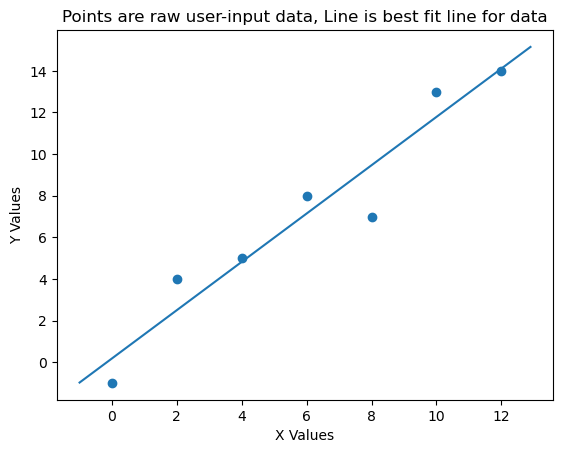

In [3]:
LinearLeastSquares(ip1)

In [4]:
def ExponentialLeastSquares(data):
    '''A least squares calculator given points on the graph as data. Data must be an N x 2 list numpy array where N is the number 
    of data points, and each row/index has a data point formatted as a sub list/array [x, y] regarding the equation y = Ae^(Bx). Outputs 
    a exponential fit for the data points using least squares regression in terms of [A, B]'''
    # Note: For exponential fit, we use the linear equation ln(y) = ln(A) + Bx to solve for A and B in the equation y = Ae^(Bx). Since
    # This is a linear equation, the math works generally the same for the linear fit
    %matplotlib inline
    import numpy as np
    import matplotlib.pyplot as plt
    xmatrl = [] # Our list of coeefeccients. For a exponential fit, first coeefecient is always 1 for 
    # ln of A and second one is the x value of the point, Matrix is also (X)
    ymatrl = [] # Our y matrix that has all the natural log of all the  dependent points (ln(y)), Matrix is also (Y)
    xval = [] # Pulling our x values out to graph later
    for i in range(len(data)):
        ithRow = [1, data[i][0]] # Creating a row of our coeeffecient matrix
        xmatrl.append(ithRow) # Appending the above created row to our cooeffecient matrix
        ymatrl.append(np.log(data[i][1])) # Appending the log of the dependent point for the given row
        xval.append(data[i][0]) # Pulling our x values out to graph later
    xmatr = np.array(xmatrl) # Changing our cooeffecient matrix to an array
    ymatr = np.array(ymatrl) # Changing our ln(y) value matrix to an array
    xtrans = np.transpose(xmatr) # Transposing our coeffecient matrix (X^T)
    xdot = np.dot(xtrans, xmatr) # Operation: (X^T)*X
    ydot = np.dot(xtrans, ymatr) # Operation: (X^T)*Y
    # Note, At this point we have ((X^T)*X)B = (X^T)*Y where B is the matrix we are looking for where the first value is the ln(A) and 
    # the second is B in the equation y = Ae^(Bx)
    betaraw = np.linalg.solve(xdot, ydot) #Solving for B mentioned above
    beta = np.array([np.exp(betaraw[0]), betaraw[1]]) # Getting A from ln(A)
    plt.scatter(xval, np.exp(ymatr)) # Plotting our initial raw data
    xsteps = np.arange(xval[0]-1, xval[-1]+1, 0.1) # Creating x-values to plot the best fit line
    scaledxstep = beta[1]*xsteps
    bestfitline = beta[0]*np.exp(scaledxstep) # Creating y-alues of the best fit line
    plt.plot(xsteps, bestfitline) # Plotting best fit line
    plt.xlabel('X Values')
    plt.ylabel('Y Values')
    plt.title('Points are raw user-input data, Curve is exponential best fit for data')
    print(f'The exponential function  of best fit for the input data is y = {beta[0]:0.5}*exp({beta[1]:0.5}*x)')
    return beta

The exponential function  of best fit for the input data is y = 4.0*exp(1.0*x)


array([4., 1.])

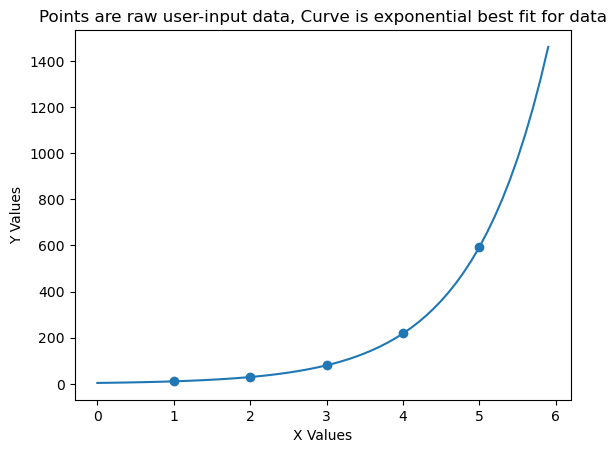

In [5]:
ExponentialLeastSquares(ipx)

In [6]:
def QuadraticLeastSquares(data):
    '''A least squares calculator given points on the graph as data. Data must be an N x 2 list numpy array where N is the number 
    of data points, and each row/index has a data point formatted as a sub list/array [x, y]. Outputs a qudratic fit (Ax^2 + Bx + C) for the data points 
    using least squares regression in terms of [C, B, A]'''
    %matplotlib inline
    import numpy as np
    import matplotlib.pyplot as plt
    xmatrl = [] # Our list of coeefeccients. For a linear fit, first coeefecient is always 1 for 
    #y intercept and second one is x value of the point, Also (X)
    ymatrl = [] # Our y matrix that has all the dependent points, Also (Y)
    xval = [] # Pulling our x values out to graph later
    for i in range(len(data)):
        ithRow = [1, data[i][0], (data[i][0])**2] # Creating a row of our coeeffecient matrix
        xmatrl.append(ithRow) # Appending the above created row to our cooeffecient matrix
        ymatrl.append((data[i][1])) # Appending the dependent point for the given row
        xval.append(data[i][0]) # Pulling our x values out to graph later
    xmatr = np.array(xmatrl) # Changing our cooeffecient matrix to an array
    ymatr = np.array(ymatrl) # Changing our Y value matrix to an array
    xtrans = np.transpose(xmatr) # Transposing our coeffecient matrix (X^T)
    xdot = np.dot(xtrans, xmatr) # Operation: (X^T)*X
    ydot = np.dot(xtrans, ymatr) # Operation: (X^T)*Y
    # Note, At this point we have ((X^T)*X)B = (X^T)*Y where B is the matrix we are looking for where the first value is C, 
    # the second is B and third is A in the equation y = Ax^2 + Bx + C
    betaraw = np.linalg.solve(xdot, ydot) #Solving for B mentioned above
    beta = np.around(betaraw, decimals = 4)
    plt.scatter(xval, ymatr) # Plotting our initial raw data
    xsteps = np.arange(xval[0]-1, xval[-1]+1, 0.1) # Creating x-values to plot the best fit line
    bestfitline = (beta[0])+(beta[1]*xsteps)+(beta[2]*(xsteps**2)) # Creating y-alues of the best fit line
    plt.plot(xsteps, bestfitline) # Plotting best fit equation
    plt.xlabel('X Values')
    plt.ylabel('Y Values')
    plt.title('Points are raw user-input data, Curve is best fit second degree polynomial for data')
    print(f'The curve of best fit for the input data is y = {beta[2]:0.5}(x^2) + {beta[1]:0.5}x + ({beta[0]:0.5})')
    return beta
    

The curve of best fit for the input data is y = 1.0(x^2) + 0.0x + (-0.0)


array([-0.,  0.,  1.])

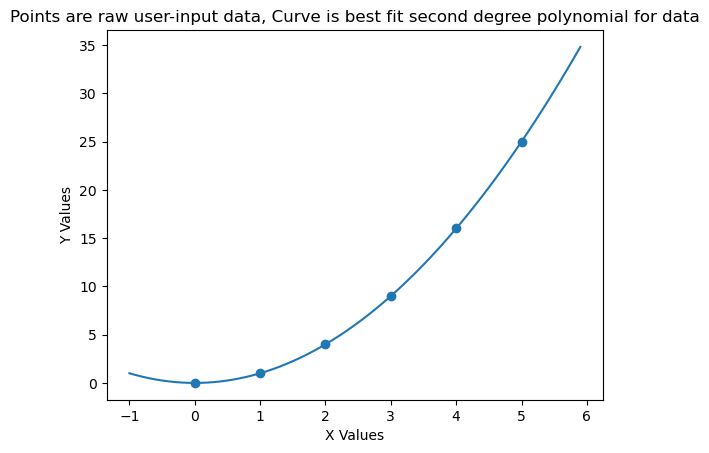

In [7]:
QuadraticLeastSquares(ip2)

In [8]:
def GeneralLeastSquares(data):
    '''A least squares calculator given points on the graph as data. Data must be an N x 2 list numpy array where N is the number 
    of data points, and each row/index has a data point formatted as a sub list/array [x, y]. Can choose which type of curve is 
    used to fit between data.
    Call 1 for linear fit, 2 for second degree polynomial fit, and e for exponential fit.'''
    functionDict = {'e':ExponentialLeastSquares, '1':LinearLeastSquares, '2':QuadraticLeastSquares} # Dictionary to store all sub-LS functions
    key = input('''Enter the key for the type of fit your data requires: 
    1 = Linear; 2 = Second degree polynomial; e = Exponential;''') # Key to choose which approximation to use (index into above dictionary)
    apx = functionDict[key](data) # Approximating the data
    return apx

Enter the key for the type of fit your data requires: 
    1 = Linear; 2 = Second degree polynomial; e = Exponential; 1


The line of best fit for the input data is y = 1.2x + (0.18)


array([0.17857143, 1.16071429])

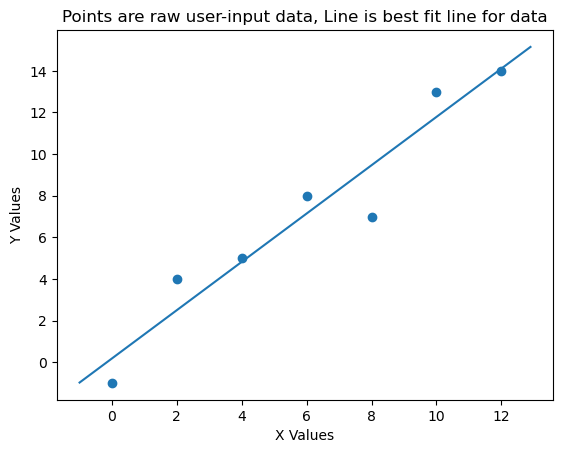

In [11]:
GeneralLeastSquares(ip1)